In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import itertools
%matplotlib inline

In [2]:
X_train = np.load("128_128_train.npy")
y_train = np.load("train_labels.npy")
X_val = np.load("128_128_val.npy")
y_val = np.load("val_labels.npy")
X_test = np.load("128_128_test.npy")
y_test = np.load("test_labels.npy")

In [3]:
print(f'X Train : {X_train.shape}')
print(f'y train : {y_train.shape}')
print(f'X val : {X_val.shape}')
print(f'y val : {y_val.shape}')
print(f'X test : {X_test.shape}')
print(f'y test : {y_test.shape}')

X Train : (8111, 128, 128, 3)
y train : (8111,)
X val : (902, 128, 128, 3)
y val : (902,)
X test : (1002, 128, 128, 3)
y test : (1002,)


In [4]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [5]:
y_train[0]

array([0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


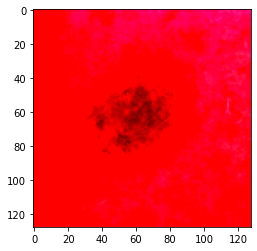

In [8]:
plt.imshow(X_train[3])

In [71]:
# Our input feature map is 128x128x3: 128x128 for the image pixels, and 3 for the three color channels: R, G, and B
img_input = layers.Input(shape=(128, 128, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu', padding='same')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Convolution2D(64, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(7, activation='softmax')(x)

# Configure and compile the model
model = Model(img_input, output)

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [73]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        1849

In [11]:
train_datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                             shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

train_datagen.fit(X_train)

val_datagen = ImageDataGenerator()
val_datagen.fit(X_val)

In [12]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)


In [13]:
batch_size = 64
epochs = 30
history = model.fit_generator(train_datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = val_datagen.flow(X_val, y_val),
                              verbose = 1, steps_per_epoch=(X_train.shape[0] // batch_size),
                              callbacks=[learning_rate_reduction])

<ipython-input-13-064a233de445>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_datagen.flow(X_train,y_train, batch_size=batch_size),


Epoch 1/30
126/126 [==============================] - 102s 801ms/step - loss: 1.0877 - accuracy: 0.6538 - val_loss: 0.9389 - val_accuracy: 0.6641 - lr: 0.0010
Epoch 2/30
126/126 [==============================] - 98s 772ms/step - loss: 0.9090 - accuracy: 0.6737 - val_loss: 0.8706 - val_accuracy: 0.6652 - lr: 0.0010
Epoch 3/30
126/126 [==============================] - 99s 784ms/step - loss: 0.8514 - accuracy: 0.6899 - val_loss: 0.7901 - val_accuracy: 0.7062 - lr: 0.0010
Epoch 4/30
126/126 [==============================] - 100s 792ms/step - loss: 0.8079 - accuracy: 0.7073 - val_loss: 0.8085 - val_accuracy: 0.7184 - lr: 0.0010
Epoch 5/30
126/126 [==============================] - 99s 786ms/step - loss: 0.7816 - accuracy: 0.7136 - val_loss: 0.7418 - val_accuracy: 0.7239 - lr: 0.0010
Epoch 6/30
126/126 [==============================] - 100s 794ms/step - loss: 0.7603 - accuracy: 0.7241 - val_loss: 0.7491 - val_accuracy: 0.7361 - lr: 0.0010
Epoch 7/30
126/126 [=============================

In [20]:
loss_test, acc_test = model.evaluate(X_test, y_test, verbose=1)
loss_val, acc_val = model.evaluate(X_val, y_val, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (acc_val, loss_val))
print("Test: accuracy = %f  ;  loss = %f" % (acc_test, loss_test))
model.save("model_cnn.h5")

29/29 [==============================] - 2s 60ms/step - loss: 0.6142 - accuracy: 0.7650
Validation: accuracy = 0.764967  ;  loss_v = 0.614188
Test: accuracy = 0.755489  ;  loss = 0.646576


In [21]:
acc = history.history['accuracy']

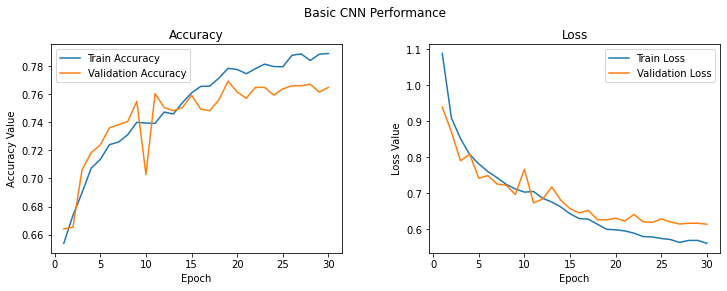

In [23]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")